<a href="https://colab.research.google.com/github/samservo09/bioinformatics-bipolar-drug-discovery/blob/main/5-model-comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bioinformatics: Drug discovery on Norepinephrine transporter protein

# Import libraries

In [1]:
! pip install -q lazypredict

In [2]:
! pip install --upgrade -q lazypredict

In [3]:
import lazypredict
import os

# Get the path to the `lazypredict` module
lazypredict_path = os.path.dirname(lazypredict.__file__)
print(lazypredict_path)

/usr/local/lib/python3.10/dist-packages/lazypredict


In [4]:
supervised_file_path = os.path.join(lazypredict_path, "Supervised.py")

# Read the original file
with open(supervised_file_path, "r") as file:
    filedata = file.read()

# Replace "sparse=False" with "sparse_output=False"
new_data = filedata.replace("sparse=False", "sparse_output=False")

# Write the modified file back
with open(supervised_file_path, "w") as file:
    file.write(new_data)

print("Modification complete.")

Modification complete.


In [5]:
# Display the relevant lines to confirm the change
!grep "OneHotEncoder" $supervised_file_path

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
        ("encoding", OneHotEncoder(handle_unknown="ignore", sparse_output=False)),


In [7]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

## Load the dataset

In [8]:
! wget https://raw.githubusercontent.com/samservo09/bioinformatics-bipolar-drug-discovery/refs/heads/main/data/Norepinephrine/Norepinephrine_bioactivity_data_3class_pIC50_pubchem_fp.csv

--2024-10-13 08:24:24--  https://raw.githubusercontent.com/samservo09/bioinformatics-bipolar-drug-discovery/refs/heads/main/data/Norepinephrine/Norepinephrine_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4604664 (4.4M) [text/plain]
Saving to: ‘Norepinephrine_bioactivity_data_3class_pIC50_pubchem_fp.csv’

Norepinephrine_bioa 100%[===================>]   4.39M  --.-KB/s    in 0.09s   

2024-10-13 08:24:25 (50.7 MB/s) - ‘Norepinephrine_bioactivity_data_3class_pIC50_pubchem_fp.csv’ saved [4604664/4604664]



In [10]:
df = pd.read_csv('Norepinephrine_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [11]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

## Data pre-processing

In [12]:
# check the X dimension
X.shape

(2582, 881)

In [13]:
# remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)
X.shape

(2582, 112)

In [14]:
# perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Compare ML algorithms

In [15]:
# defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [00:28<00:00,  1.48it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002522 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 336
[LightGBM] [Info] Number of data points in the train set: 2065, number of used features: 112
[LightGBM] [Info] Start training from score 6.654221


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


 98%|█████████▊| 41/42 [00:25<00:00,  2.02it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002179 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 336
[LightGBM] [Info] Number of data points in the train set: 2065, number of used features: 112
[LightGBM] [Info] Start training from score 6.654221


100%|██████████| 42/42 [00:26<00:00,  1.60it/s]


In [16]:
# performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,0.81,0.82,0.50,0.12
ExtraTreeRegressor,0.81,0.82,0.50,0.08
ExtraTreesRegressor,0.81,0.82,0.50,2.76
GaussianProcessRegressor,0.81,0.82,0.50,1.63
XGBRegressor,0.80,0.81,0.52,0.53
RandomForestRegressor,0.78,0.79,0.54,2.70
BaggingRegressor,0.77,0.78,0.56,0.26
MLPRegressor,0.74,0.75,0.59,3.65
HistGradientBoostingRegressor,0.70,0.72,0.64,0.99


In [17]:
# performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LGBMRegressor,0.43,0.56,0.82,0.37
HistGradientBoostingRegressor,0.42,0.55,0.83,0.87
RandomForestRegressor,0.42,0.54,0.83,2.16
BaggingRegressor,0.39,0.52,0.85,0.25
NuSVR,0.38,0.52,0.86,0.54
SVR,0.37,0.51,0.87,0.81
XGBRegressor,0.37,0.50,0.87,0.91
MLPRegressor,0.36,0.50,0.88,3.58
GradientBoostingRegressor,0.33,0.47,0.90,0.81


## Data Visualization of model performance

[(0.0, 1.0)]

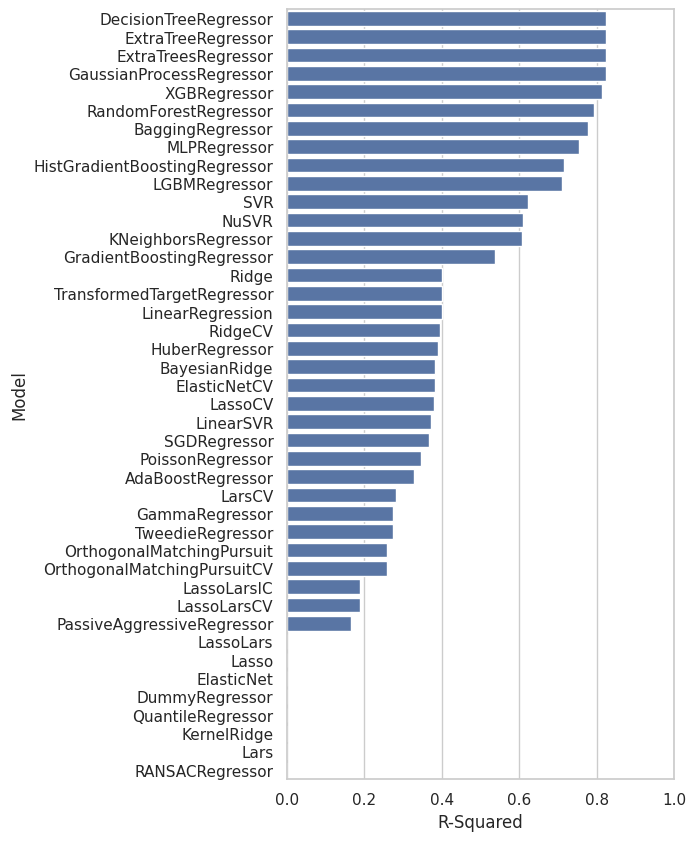

In [18]:
# bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

# train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

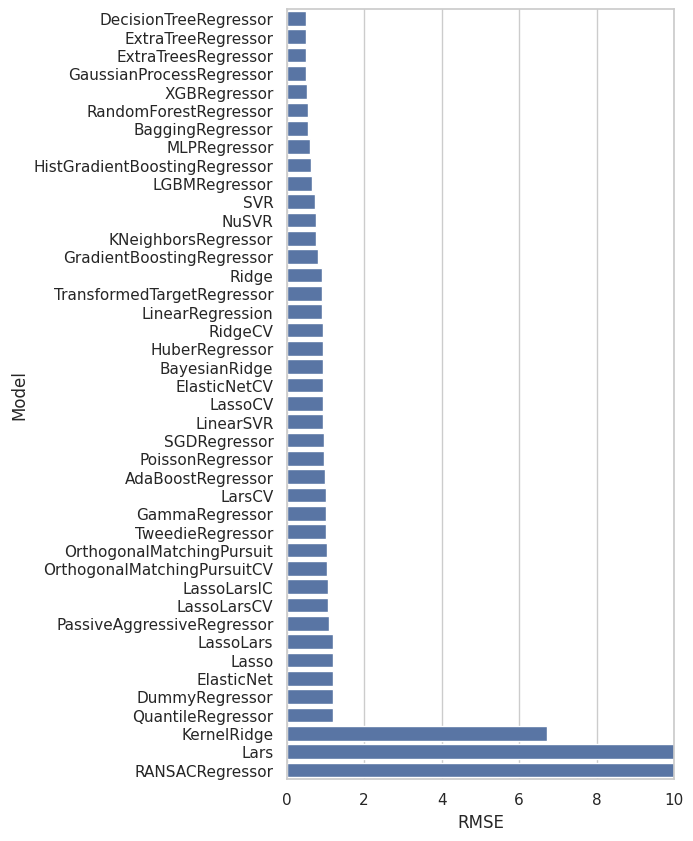

In [19]:
# bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

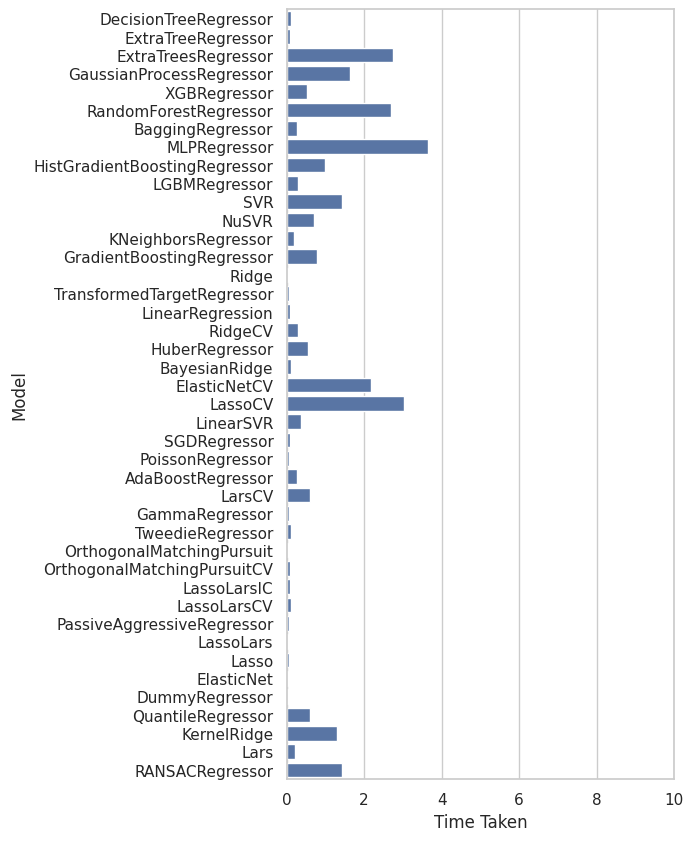

In [20]:
# bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))

### Comparison of predicted and actual values with LGBMRegressor

In [24]:
import lightgbm as lgb
import matplotlib.pyplot as plt

In [27]:
# train the LGBMRegressor model
model = lgb.LGBMRegressor()
model.fit(X_train, Y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002624 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 224
[LightGBM] [Info] Number of data points in the train set: 2065, number of used features: 112
[LightGBM] [Info] Start training from score 6.654221


LGBMRegressor()

In [26]:
# make predictions on the test set
Y_pred = model.predict(X_test)

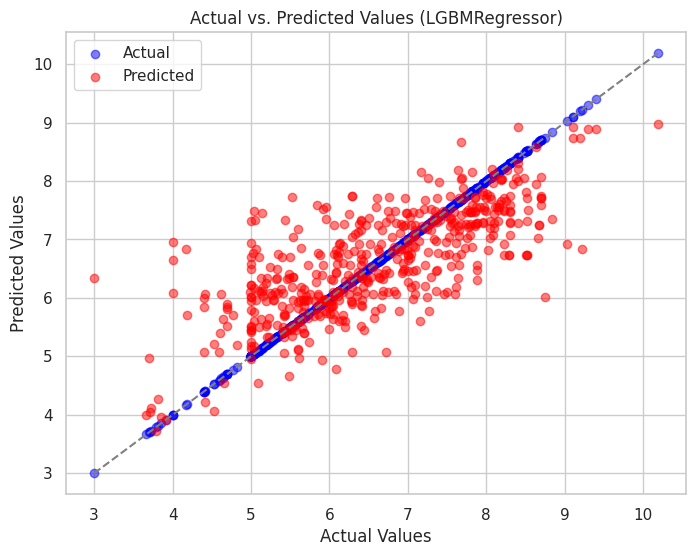

In [29]:
# create the scatterplot
plt.figure(figsize=(8, 6))

# Plot actual values in blue
plt.scatter(Y_test, Y_test, color='blue', alpha=0.5, label='Actual')

# Plot predicted values in red
plt.scatter(Y_test, Y_pred, color='red', alpha=0.5, label='Predicted')

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (LGBMRegressor)")

# Add a diagonal line for reference
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='gray')

plt.legend()  # Show legend to distinguish colors
plt.show()

The plot suggests that the LGBMRegressor model is a reasonable choice for this task. However, further analysis and evaluation are needed to fully understand its performance and identify areas for improvement.

## Conclusion

In [23]:
# sort by R-squared in descending order
best_model = predictions_test.sort_values(by=['R-Squared', 'Adjusted R-Squared', 'RMSE'], ascending=False)

# print the top model
print(f"Best model based on R-squared, Adjusted R-Squared, and RMSE: {best_model.index[0]}")

Best model based on R-squared, Adjusted R-Squared, and RMSE: LGBMRegressor


Based on model comparison, **LGBMRegressor** is the best model for the dataset. <br>
*   **R-Squared:** 0.43
*   **Adjusted R-Squared:** 0.56
*   **RMSE:**  0.82

